In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Load the dataset

In [5]:
covid_data_path = 'covid.csv'  # Update this path
covid_df = pd.read_csv(covid_data_path)

## Step 2: Exploratory Data Analysis (EDA)

In [7]:
# Display the first few rows of the dataset
covid_df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [8]:
# Summary statistics for numeric columns
covid_df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
count,1.949600e+04,19496.000000,19496.000000,19496.000000,19119.000000,19119.000000,19119.000000,19119.000000,5.164000e+03,4592.000000,...,17516.000000,17664.000000,17514.000000,11618.000000,17679.000000,18322.000000,14444.000000,14290.000000,7674.000000,16336.000000
mean,1.752634e+04,540.990152,1162.475739,35.055601,499.008529,13.312513,21.855009,0.585176,2.466140e+05,10273.971690,...,9.922658,6.322441,23347.911758,10.004596,244.735053,8.006378,11.353923,32.639889,55.563306,3.238098
std,1.808525e+05,4858.071697,12377.578661,334.755956,1458.509832,63.749619,92.098024,3.604289,8.946899e+05,34126.717986,...,6.478670,4.452068,21417.397147,17.425455,119.087724,4.019256,10.575776,13.190948,30.870108,2.616300
min,0.000000e+00,-2461.000000,0.000000,0.000000,0.000000,-265.189000,0.000000,0.000000,1.000000e+00,1.000000,...,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000
25%,5.000000e+00,0.000000,0.000000,0.000000,0.593000,0.000000,0.000000,0.000000,8.090250e+03,538.500000,...,4.031000,2.380000,6885.829000,0.500000,145.183000,5.310000,1.900000,21.400000,24.640000,1.400000
50%,8.400000e+01,2.000000,1.000000,0.000000,26.720000,0.246000,0.167000,0.000000,4.302400e+04,1946.000000,...,7.846500,5.021000,15847.419000,1.500000,233.070000,7.110000,7.100000,31.400000,59.607000,2.600000
75%,1.135250e+03,43.000000,24.000000,1.000000,252.172000,5.857500,4.538500,0.054000,1.535690e+05,6233.250000,...,15.413000,9.842000,35938.374000,10.000000,311.110000,10.080000,20.000000,40.800000,84.169000,4.280000
max,5.273572e+06,107909.000000,341722.000000,10520.000000,19594.555000,4944.376000,1237.551000,200.040000,1.378479e+07,416546.000000,...,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000


In [9]:
# Check for missing values
missing_values = covid_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older            

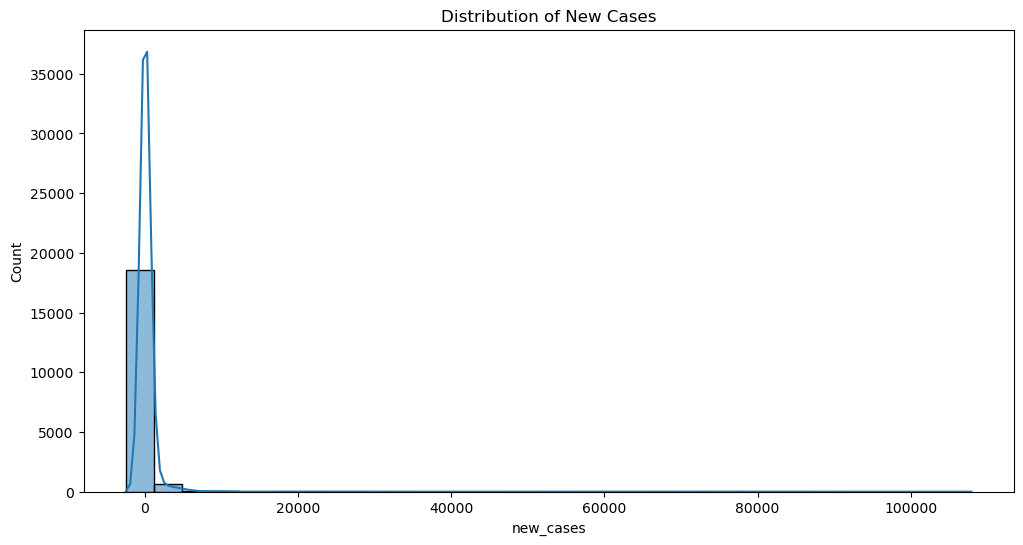

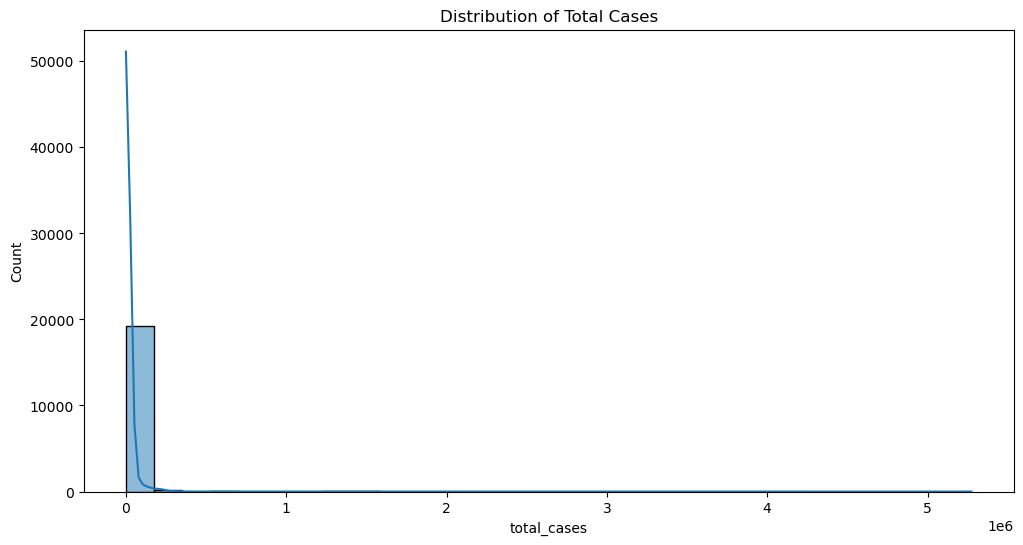

In [10]:
# Visualize the distribution of key features
plt.figure(figsize=(12, 6))
sns.histplot(covid_df['new_cases'], bins=30, kde=True)
plt.title('Distribution of New Cases')
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(covid_df['total_cases'], bins=30, kde=True)
plt.title('Distribution of Total Cases')
plt.show()

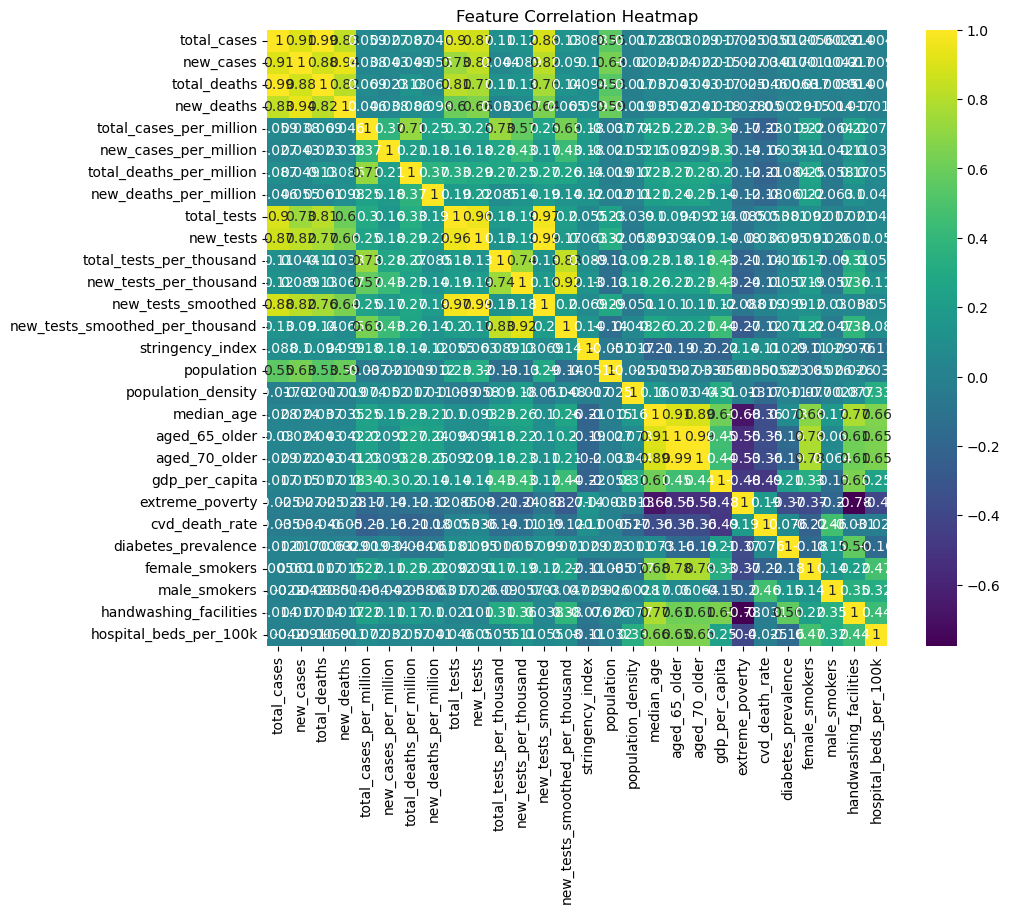

In [20]:
numeric_cols = covid_df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
# Compute and plot the correlation matrix of the numeric columns
sns.heatmap(numeric_cols.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()

## Step 3: Data Preprocessing

In [12]:
# Dropping rows with missing values in selected features for simplicity
selected_features = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']
covid_df_selected = covid_df.dropna(subset=selected_features)

In [13]:
# Prepare the features (X) and target variable (y) - target is 'new_cases'
X = covid_df_selected[['total_cases', 'total_deaths', 'new_deaths']]
y = covid_df_selected['new_cases']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Modeling

In [16]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [17]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

In [18]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

## Step 5: Evaluation

In [19]:
# Calculate and print evaluation metrics for all three models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}\n")

print("Decision Tree Results:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}\n")

print("Random Forest Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Linear Regression Results:
Mean Squared Error: 1182059.0602800017
R-squared: 0.9527532278768599

Decision Tree Results:
Mean Squared Error: 1028489.4681345106
R-squared: 0.9588913877784665

Random Forest Results:
Mean Squared Error: 735751.2544939816
R-squared: 0.9705921023504889


The results you've shared provide a clear comparison of the performance of three different models: Linear Regression, Decision Tree, and Random Forest. Let's analyze these results and extract some insights.

### Model Performance Summary:

- **Linear Regression**:
  - Mean Squared Error (MSE): 1,182,059.06
  - R-squared (R²): 0.953
  
- **Decision Tree**:
  - Mean Squared Error (MSE): 1,028,489.47
  - R-squared (R²): 0.959
  
- **Random Forest**:
  - Mean Squared Error (MSE): 735,751.25
  - R-squared (R²): 0.971

### Insights:

1. **Overall Performance**:
   - The **Random Forest** model outperforms both the Decision Tree and Linear Regression models in terms of both Mean Squared Error (MSE) and R-squared (R²) metrics. It has the lowest MSE, indicating that the predictions made by the Random Forest model are, on average, closer to the actual values. The higher R² value also indicates that the Random Forest model explains a greater proportion of the variance in the target variable (new cases) than the other two models.

2. **Comparison Between Models**:
   - The **Decision Tree** model performs better than the Linear Regression model, as evidenced by a lower MSE and a higher R² value. This suggests that the nonlinear relationships and interactions between features are better captured by the Decision Tree model.
   - However, the **Random Forest** model, which is an ensemble of Decision Trees, provides a significant improvement over the single Decision Tree model. This improvement is likely due to the Random Forest's ability to reduce overfitting by averaging multiple trees, leading to more robust and generalized predictions.

3. **Model Selection**:
   - Based on these results, the **Random Forest** model is the best performer for predicting the number of new COVID-19 cases among the three models tested. Its superior performance makes it a more reliable choice for this specific prediction task, assuming the model's complexity and computational requirements are manageable within the project's constraints.

4. **Considerations for Future Modeling**:
   - While the Random Forest model performs the best in this scenario, it's important to consider factors such as training time, interpretability, and the ability to handle new or evolving data. For instance, simpler models like Linear Regression are much easier to interpret and understand.
   - The high R² values across all models suggest that the features selected (total cases, total deaths, and new deaths) are strongly predictive of new cases. However, exploring additional features and data preprocessing techniques might further improve model performance.

### Conclusion:

The **Random Forest** model is the most effective among the ones tested for predicting the number of new COVID-19 cases. Its ability to capture complex relationships and reduce overfitting makes it a strong candidate for this task. Nonetheless, the choice of model should also consider practical aspects like computational efficiency, ease of understanding, and how well the model can be updated as new data becomes available.